In [50]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
import explore

## Regression Explore Exercises
1.) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
null_hypothesis = "Customer tenure is independent of total charges"
alternative_hypothesis = "Customer tenure and total charges is not independent"

In [3]:
df = wrangle.wrangle_telco()

In [4]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [5]:
#exploring univariate

In [6]:
x = df.tenure
y= df.total_charges

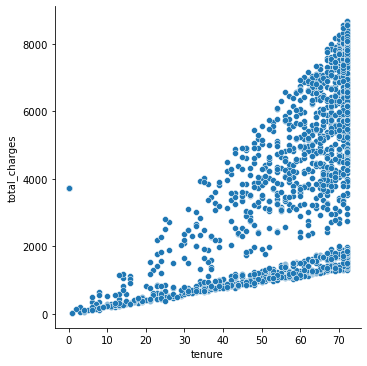

In [7]:
sns.relplot(x, y, kind = 'scatter') #I see an outlier for about 0 months with a total charge of ~3000?

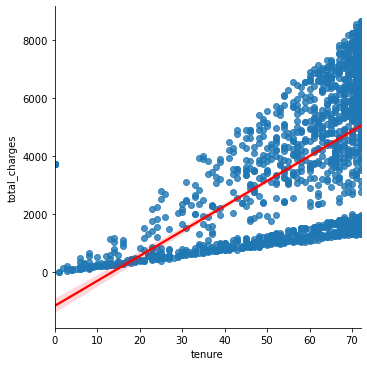

In [8]:

sns.lmplot(x="tenure", y="total_charges", data=df, line_kws={'color': 'red'})
plt.show()

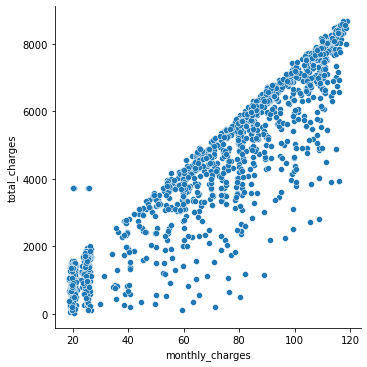

In [9]:
#exploring monthly_charges and total_charges (univariate)
#Outlier at about ~(20,3000)b
sns.relplot(x="monthly_charges", y="total_charges", data=df)
plt.show()

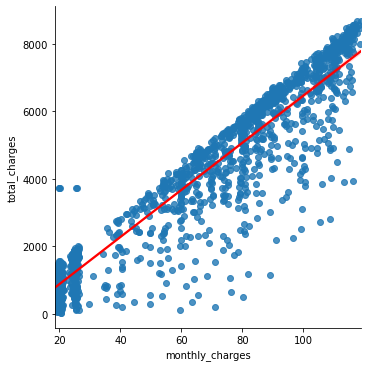

In [10]:
sns.lmplot(x="monthly_charges", y="total_charges", data=df, line_kws={'color': 'red'})
plt.show()

Takeaways for Univariates:

As tenure increases, total charges increases. Sounds about right.
As monthly charges increases total charges increases.

Explore with Split Data Sets

In [23]:
#bringing in split data
train, validate, test = wrangle.wrangle_split_telco()

In [24]:
#quality assurance
train.shape, validate.shape, test.shape

((949, 3), (407, 3), (339, 3))

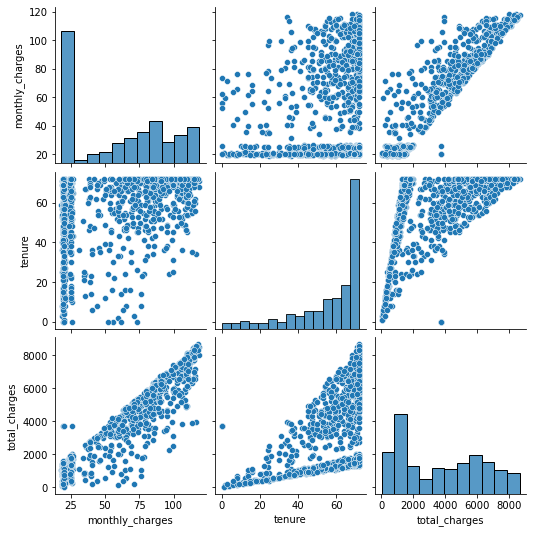

In [25]:
sns.pairplot(train)

<AxesSubplot:>

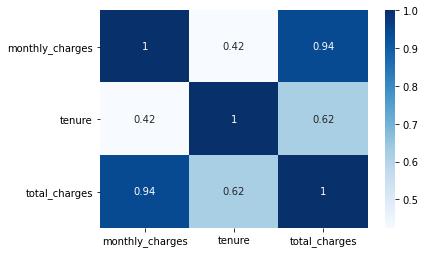

In [26]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways for Bivariate Exploration:

Monthly charges and tenure and strong, positively correlated with total_charges
Tenure and monthly charges are +0.5 related, could be some relationship which contributes to total charges.

2.) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
def plot_variable_pairs(df):
    sns.pairplot(df, corner = True, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

In [29]:
def plot_variable_pairs(df):
    '''accepts a dataframe as input
    split into train, validate, and test
    plots all of the pairwise relationships along with the regression line for each pair.'''
    plot = sns.PairGrid(df)
    plot.map(sns.regplot)
    return plot

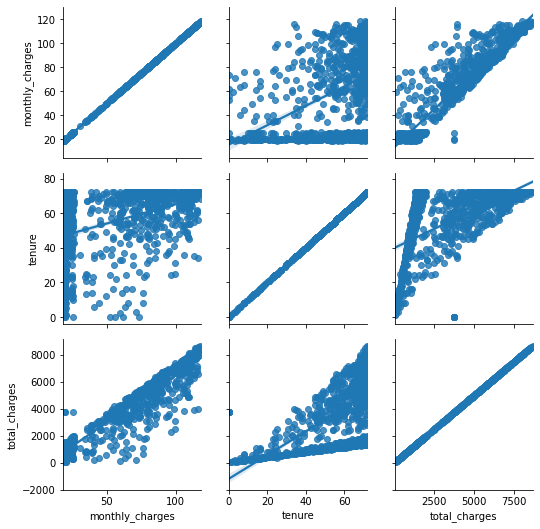

In [31]:
plot_variable_pairs(train)

3.) Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [33]:
def months_to_years(df):
    df = wrangle.wrangle_telco()
    df['tenure_years'] = df.tenure//12
    return df

In [34]:
df = months_to_years(df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1695 entries, 0013-SMEOE to 9995-HOTOH
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1695 non-null   float64
 1   tenure           1695 non-null   int64  
 2   total_charges    1695 non-null   float64
 3   tenure_years     1695 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 66.2+ KB


In [36]:
train.select_dtypes('float64').columns.tolist()

['monthly_charges', 'total_charges']

In [37]:
quant_vars = df.select_dtypes('float64').columns.tolist()
cat_vars = df.select_dtypes('int64', 'object').columns.tolist()

In [38]:
quant_vars

['monthly_charges', 'total_charges']

In [39]:
cat_vars

['tenure', 'tenure_years']

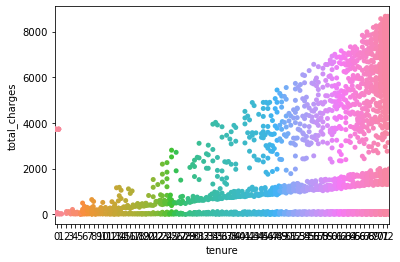

In [40]:
for col in quant_vars:
    sns.swarmplot(x=cat_vars[0], y=col, data=df)

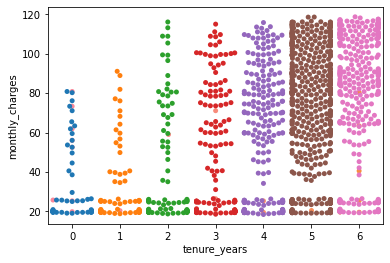

In [41]:
for i in cat_vars:
    sns.swarmplot(x=i, y=quant_vars[0], data=df)

In [43]:
def plot_categorical_and_continuous_vars(df):
    quant_vars = df.select_dtypes('float64').columns.tolist()
    cat_vars = df.select_dtypes('int64', 'object').columns.tolist()
    cat_vars_len = len(cat_vars)
    swarm = sns.swarmplot(x=cat_vars, y=quant_vars, data=df)

In [44]:
cat_vars_len = len(cat_vars)

In [45]:
cat_vars_len

2

In [46]:
def plot_categorical_and_continuous_vars(df, cat_vars, quant_vars):
    sns.barplot(data=df, y=quant_vars, x=cat_vars)
    plt.show()
    sns.violinplot(data=df, y=quant_vars, x=cat_vars)
    plt.show()
    sns.boxplot(data=df, y=quant_vars, x=cat_vars)

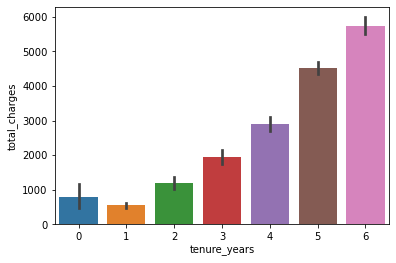

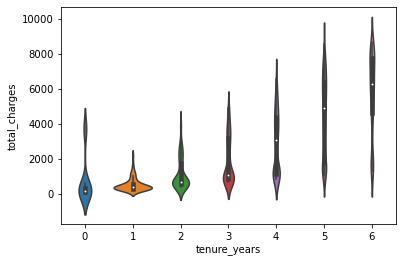

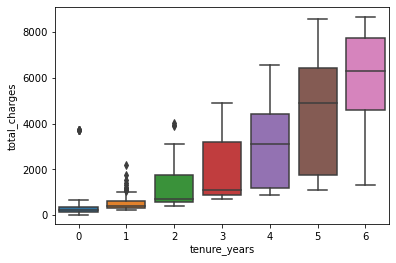

In [48]:
plot_categorical_and_continuous_vars(df, 'tenure_years', 'total_charges')

5.) Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

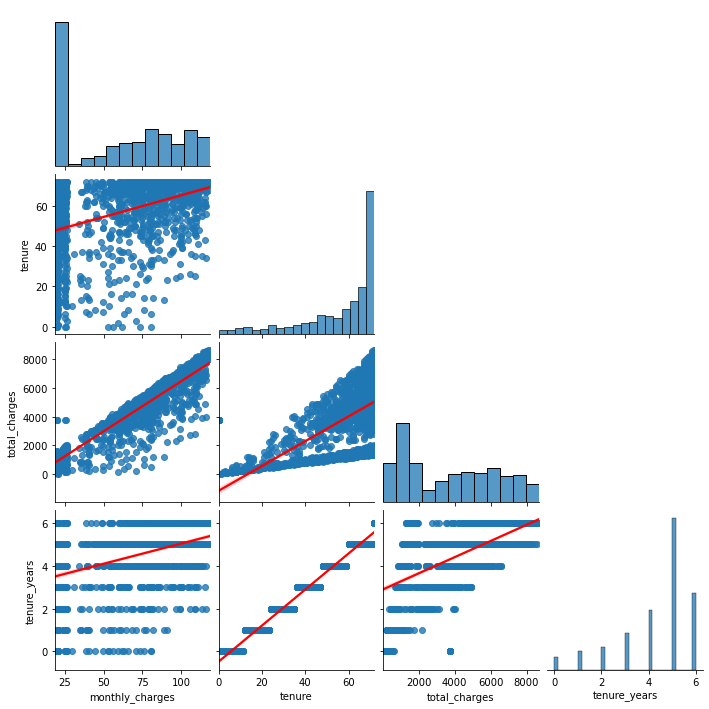

In [51]:
explore.plot_variable_pairs(df)

In [52]:
explore.months_to_years(train)

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
7501-IWUNG,73.80,61,4616.05,5
1303-SRDOK,69.05,55,3842.60,4
3967-VQOGC,24.90,67,1680.25,5
3777-XROBG,19.55,58,1079.65,4
5075-JSDKI,24.45,59,1493.10,4
...,...,...,...,...
2664-XJZNO,104.90,72,7559.55,6
0567-XRHCU,43.95,69,2960.10,5
5334-AFQJB,25.10,72,1789.90,6


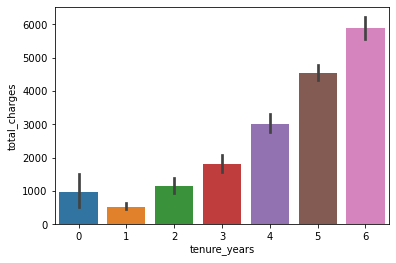

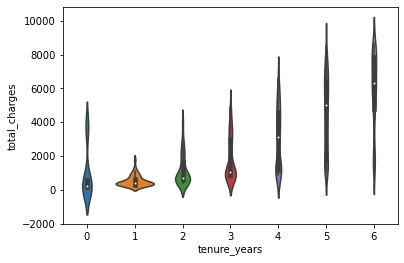

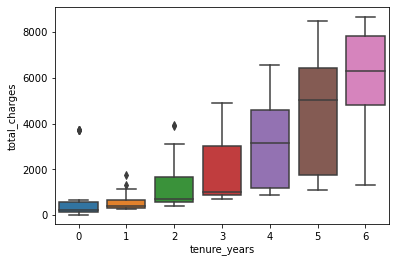

In [53]:
explore.plot_categorical_and_continuous_vars(train, 'tenure_years', 'total_charges')

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

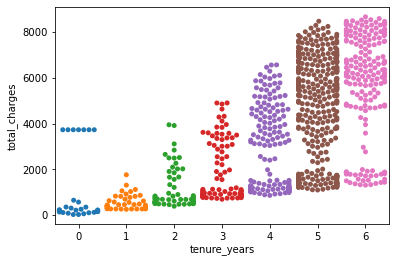

In [54]:
sns.swarmplot(x='tenure_years', y='total_charges', data=train)